### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('files/movielens_data.csv')
print(df.shape)
df.head()

(100000, 8)


,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,186,39.0,F,executive,302,NaN,Crime,891717742
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
4,166,47.0,NaN,educator,346,1.0,Drama,886397596


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [58]:
len(df)

100000

In [59]:
# Remove all values 'none' for occupation
occup_df = df[df['occupation'] != 'none']
occup_df

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,186,39.0,F,executive,302,NaN,Crime,891717742
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
4,166,47.0,NaN,educator,346,1.0,Drama,886397596
...,...,...,...,...,...,...,...,...
99995,880,13.0,M,student,476,3.0,Comedy,880175444
99996,716,36.0,F,administrator,204,5.0,Sci-Fi,879795543
99997,276,21.0,M,student,1090,1.0,Thriller,874795795
99998,13,47.0,M,educator,225,2.0,Comedy,882399156


In [60]:
# Check 'none' has been removed from occupation 
np.unique(occup_df['occupation'], return_counts = True)

(array(['administrator', 'artist', 'doctor', 'educator', 'engineer',
        'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
        'librarian', 'marketing', 'other', 'programmer', 'retired',
        'salesman', 'scientist', 'student', 'technician', 'writer'],
       dtype=object),
 array([ 7479,  2308,   540,  9442,  8175,  2095,  3403,  2804,   299,
         1345,  5273,  1950, 10633,  7801,  1609,   856,  2058, 21957,
         3506,  5536], dtype=int64))

In [61]:
# Remove rows with missing values in age, gender and rating
df_clean = occup_df.dropna(how = 'any', subset = ['age', 'gender', 'rating'], axis = 0)
df_clean[['rating', 'age', 'gender']].isna().sum() # Cheack for any na values in the columns

rating    0
age       0
gender    0
dtype: int64

In [62]:
df_clean.shape

(99022, 8)

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


In [63]:
# Q2.1 
print('Number of unique users:',len(np.unique(df_clean['userId'])))
print('Number of unique occupations:',len(np.unique(df_clean['occupation'])))
print('Number of unique movies:',len(np.unique(df_clean['movieId'])))
print('Number of unique genres:',len(np.unique(df_clean['genre'])))

Number of unique users: 934
Number of unique occupations: 20
Number of unique movies: 1682
Number of unique genres: 19


In [64]:
# Q2.2
df_clean['rating'].describe()

count    99022.000000
mean         3.527792
std          1.125743
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [65]:
# Q2.3
RatingsPerUser = np.unique(df_clean['userId'], return_counts = True) # Use np.unique to identify the unique values with counts
RatingsPerUser = pd.DataFrame(RatingsPerUser) # Put the arrays into a data frame
RatingsPerUser = RatingsPerUser.T # data frame with one column for the unique userIds and one for their counts
RatingsPerUser.rename(columns={0: 'Unique_userId', 1: '#ratings'}, inplace = True) # Rename the columns  
RatingsPerUser['#ratings'].describe() # Descriptive statistics

count    934.000000
mean     106.019272
std      100.793963
min       19.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      736.000000
Name: #ratings, dtype: float64

In [66]:
# Q2.4
RatingsPerMovie = np.unique(df_clean['movieId'], return_counts = True) # Use np.unique to identify the unique values with counts
RatingsPerMovie = pd.DataFrame(RatingsPerMovie) # Put the arrays into a data frame
RatingsPerMovie = RatingsPerMovie.T # data frame with one column for the unique movieIds and one for their counts
RatingsPerMovie.rename(columns={0: 'Unique_movie', 1: '#ratings'}, inplace = True) # Rename the columns 
RatingsPerMovie['#ratings'].describe() # Descriptive statistics

count    1682.000000
mean       58.871581
std        79.629796
min         1.000000
25%         6.000000
50%        26.000000
75%        79.000000
max       578.000000
Name: #ratings, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [67]:
# Comparasin of means for ratings given by males and females
gend_rat = df_clean[['gender', 'rating']].groupby('gender').mean()
gend_rat

,rating
gender,
F,3.530667
M,3.526802


[Text(0.5, 1.0, 'Ratings by Gender')]

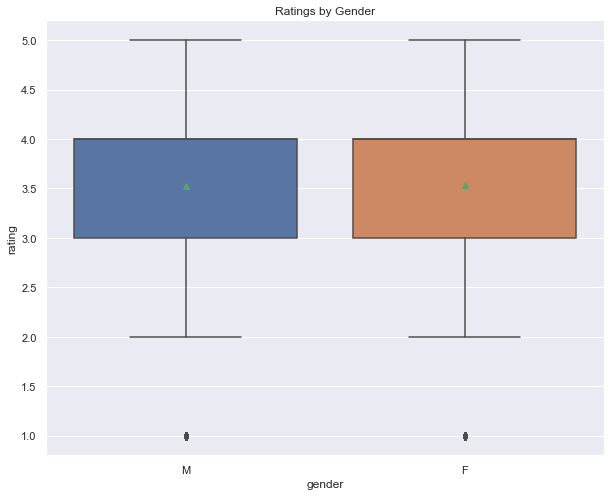

In [68]:
# Boxplot of the ratings given by males and females
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(data = df_clean, x = 'gender', y = 'rating', showmeans=True).set(title='Ratings by Gender')

The average ratings made by females are only slightly higher than those made by males, with the difference being approximately 0.004. The boxplot 'Ratings by Gender' shows that there is little to no difference in the variation of data between genders, with the interquartile range, maximum, minimum and outlier values all being equal. This shows that there is little to no correaltion between gender and rating.

In [69]:
# Comparasin of means for ratings given by different occupations
occup_rat = df_clean[['occupation', 'rating']].groupby('occupation').mean()
occup_rat

,rating
occupation,
administrator,3.635889
artist,3.653380
doctor,3.690167
educator,3.671577
engineer,3.541539
entertainment,3.441050
executive,3.349029
healthcare,2.897216
homemaker,3.301003


Standard deviation of the average ratings given by each occupation: 0.18366951168078754


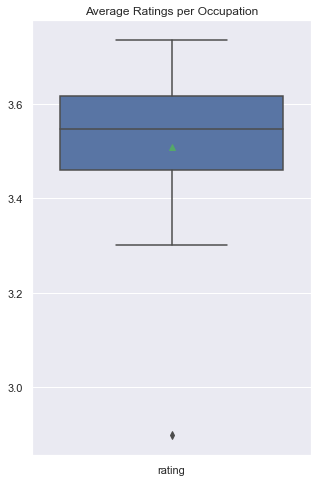

In [70]:
# Boxplot of the average ratings given by each occupation
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(data = occup_rat, showmeans=True).set(title='Average Ratings per Occupation')
# Standard deviation of the average ratings given by each occupation
print('Standard deviation of the average ratings given by each occupation:', occup_rat['rating'].std())

[Text(0.5, 1.0, 'Ratings by Occupation')]

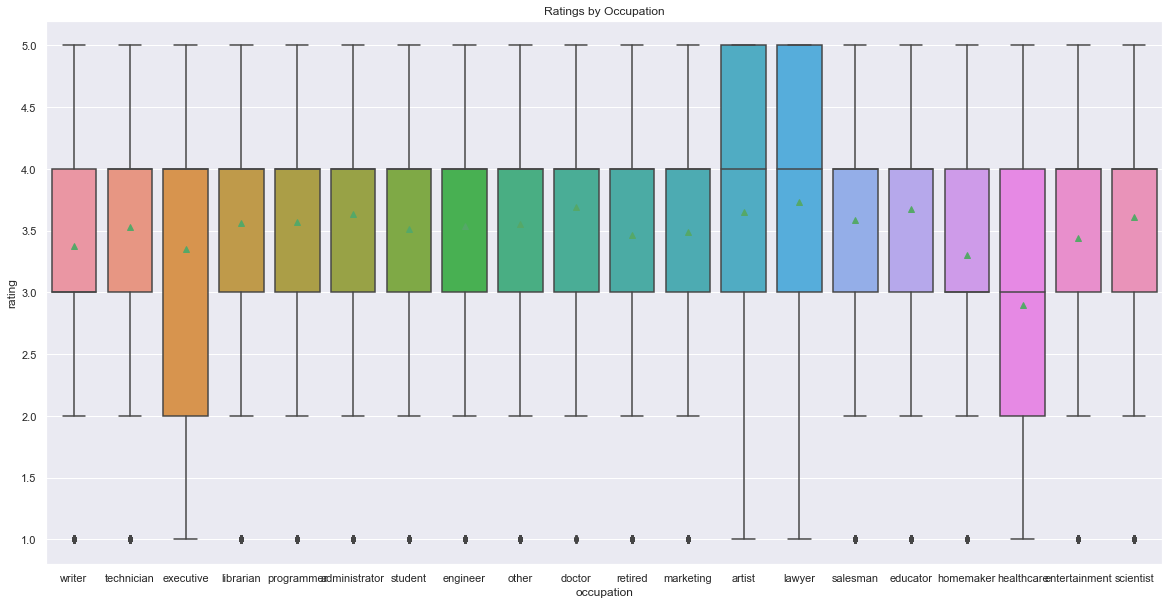

In [71]:
# Boxplot of the ratings given by differewnt occupations
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = df_clean, x = 'occupation', y = 'rating', showmeans=True).set(title='Ratings by Occupation')

The average ratings made by different occupations vary slightly with a relatively small standard deviation of 0.184 between them. The boxplot 'Average Ratings per Occupation' highlights this small amount of variance as it shows an interquartile range inbetween 3.4 and 3.7. Meanwhile the plot 'Ratings by Occupation' shows that majority of occupations made ratings with the same interquartile range of 3 to 4 and the same maximum and minimum values of 5 and 2 respectively. The exceptions are executives and healthcare workers who had a lower interquartile range of 4 to 2, while artists and lawyers had a higher interquartile range of 5 to 3. This shows that there is little to no correaltion between occupation and rating.

In [72]:
# Comparasin of means for ratings given by differewnt genres
gen_rat = df_clean[['genre', 'rating']].groupby('genre').mean()
gen_rat

,rating
genre,
Action,3.455195
Adventure,3.420509
Animation,3.459278
Children,3.280056
Comedy,3.338764
Crime,3.706601
Documentary,3.671429
Drama,3.688156
Fantasy,3.515260


Standard deviation of the average ratings given by each genre: 0.20101278188662255


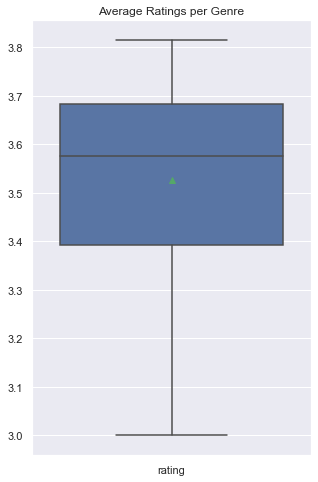

In [73]:
# Boxplot of the average ratings given by each genre
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(data = gen_rat, showmeans=True).set(title='Average Ratings per Genre')
# Standard deviation of the average ratings given by each occupation
print('Standard deviation of the average ratings given by each genre:', gen_rat['rating'].std())

[Text(0.5, 1.0, 'Ratings by Genre')]

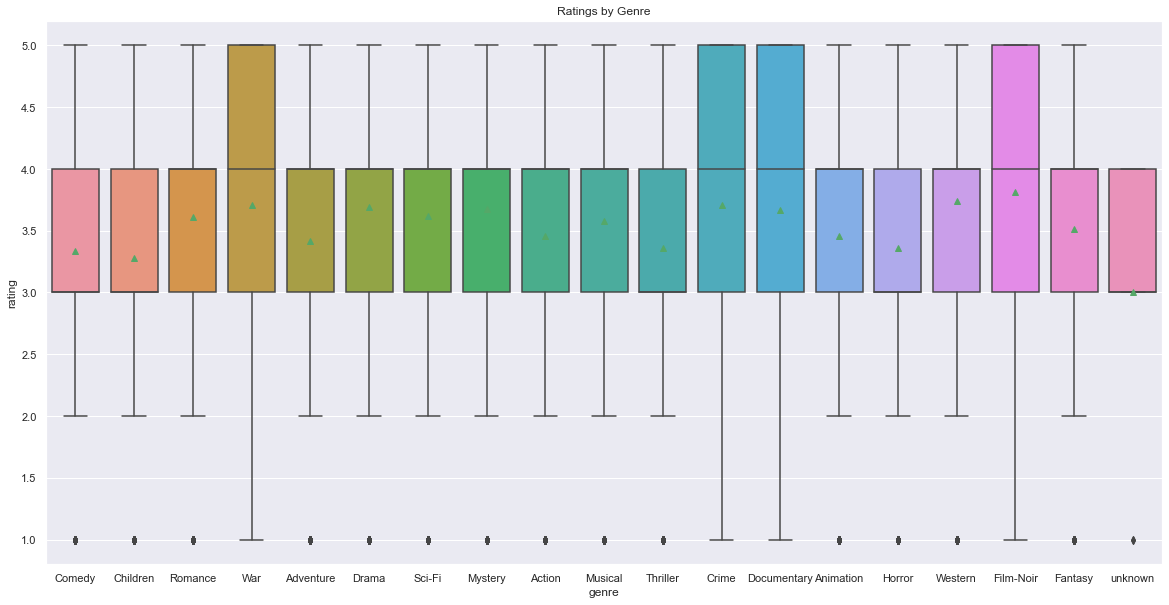

In [74]:
# Boxplot of the ratings given by differewnt genres
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = df_clean, x = 'genre', y = 'rating', showmeans=True).set(title='Ratings by Genre')

The average ratings of movies of different genres vary slightly with a relatively small standard deviation of 0.201 between them. The boxplot 'Average Ratings per Genre' highlights this small amount of variance as it shows an interquartile range approximately inbetween 3.39 and 3.69. Meanwhile the plot 'Ratings by Genre' shows that majority of genres had ratings with the same interquartile range of 3 to 4 and the same maximum and minimum values of 5 and 2 respectively. The exceptions are  War, Crime, Documentry and Film-Noir which all had a higher interquartile ranges of 5 to 3. This shows that there is little to no correaltion between genre and rating.

Overall the data does not provide adequate information to make inferences about the rating of movies as there is insufficient correalation between rating and gender/occupation/genre.

#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

In [75]:
df_clean

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
...,...,...,...,...,...,...,...,...
99995,880,13.0,M,student,476,3.0,Comedy,880175444
99996,716,36.0,F,administrator,204,5.0,Sci-Fi,879795543
99997,276,21.0,M,student,1090,1.0,Thriller,874795795
99998,13,47.0,M,educator,225,2.0,Comedy,882399156


In [76]:
# Remove ratings given by users 10 and younger
df_clean = df_clean[df_clean['age'] > 10]
df_clean.shape

(98948, 8)

In [77]:
df_clean[df_clean['age'] <= 10] # Check for any ages less than or equal to 10

,userId,age,gender,occupation,movieId,rating,genre,timestamp


In [78]:
# Identify which users have rated 20 or more movies
RatingsPerUser2 = np.unique(df_clean['userId'], return_counts = True) # Use np.unique to identify the unique values with counts
RatingsPerUser2 = pd.DataFrame(RatingsPerUser2) # Put the arrays into a data frame
RatingsPerUser2 = RatingsPerUser2.T # data frame with one column for the unique userIds and one for their counts
RatingsPerUser2.rename(columns={0: 'Unique_userId', 1: '#ratings'}, inplace = True) # Rename the columns
User20plusRatings = RatingsPerUser2[RatingsPerUser2['#ratings'] >= 20] # Identify the users who have rated 20 or more movies
User20plusRatings['Unique_userId']

0        1
1        2
2        3
3        4
4        5
      ... 
927    939
928    940
929    941
930    942
931    943
Name: Unique_userId, Length: 931, dtype: int64

In [79]:
# Only include users who have rated 20 or more movies using the isin function
df_clean = df_clean[df_clean['userId'].isin(User20plusRatings['Unique_userId'])]
df_clean.shape

(98929, 8)

In [80]:
# Identify which movies that have been rated 10 or more times
RatingsPerMovie2 = np.unique(df_clean['movieId'], return_counts = True) # Use np.unique to identify the unique values with counts
RatingsPerMovie2 = pd.DataFrame(RatingsPerMovie2) # Put the arrays into a data frame
RatingsPerMovie2 = RatingsPerMovie2.T # data frame with one column for the unique userIds and one for their counts
RatingsPerMovie2.rename(columns={0: 'Unique_movieId', 1: '#ratings'}, inplace = True) # Rename the columns
Movie10plusRatings = RatingsPerMovie2[RatingsPerMovie2['#ratings'] >= 10] # Identify the movies which have been rated 10 or more times
Movie10plusRatings['Unique_movieId']

0          1
1          2
2          3
3          4
4          5
        ... 
1482    1483
1502    1503
1517    1518
1539    1540
1614    1615
Name: Unique_movieId, Length: 1147, dtype: int64

In [81]:
# Only include movies who have been rated 10 or more times using the isin function
df_clean = df_clean[df_clean['movieId'].isin(Movie10plusRatings['Unique_movieId'])]
df_clean.shape

(96854, 8)

In [82]:
len(df_clean)

96854

In [83]:
df_clean.to_csv('files/movielens_data_clean.csv', index=False)